In [175]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [176]:
iris = load_iris()

In [177]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [178]:
ann = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ann.fit(iris.data, iris.target)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.10, random_state=42)

In [180]:
split = tree.DecisionTreeClassifier()
split = split.fit(X_train, y_train)
y_predict = split.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print('Akurasi: {} %'.format(accuracy * 100))

Akurasi: 100.0 %


In [181]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [182]:
print(classification_report(y_test, y_predict, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         6
 versicolor       1.00      1.00      1.00         6
  virginica       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00        15



Confusion matrix, without normalization
[[6 0 0]
 [0 6 0]
 [0 0 3]]


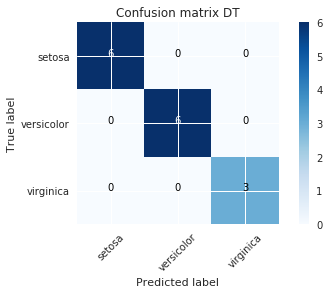

In [183]:
cnf_matrix = confusion_matrix(y_test, y_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris.target_names,
                      title='Confusion matrix DT')

In [184]:
ann_split = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ann_split.fit(X_train, y_train)
y_ann_predict = ann_split.predict(X_test)
accuracy_ann = accuracy_score(y_test, y_ann_predict)
print('Akurasi: {} %'.format(accuracy_ann * 100))

Akurasi: 20.0 %


In [185]:
print(classification_report(y_test, y_ann_predict, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       0.00      0.00      0.00         6
 versicolor       0.00      0.00      0.00         6
  virginica       0.20      1.00      0.33         3

avg / total       0.04      0.20      0.07        15



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[0 0 6]
 [0 0 6]
 [0 0 3]]


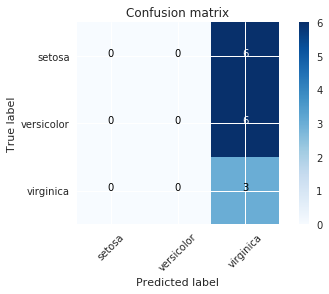

In [186]:
cnf_matrix_ann = confusion_matrix(y_test, y_ann_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix_ann, classes=iris.target_names,
                      title='Confusion matrix')

In [187]:
scores = cross_val_score(clf, iris.data, iris.target, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.09)


In [188]:
scores = cross_val_score(ann, iris.data, iris.target, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.33 (+/- 0.00)


In [189]:
from sklearn.externals import joblib
joblib.dump(clf, 'full_train.pkl')

['full_train.pkl']

In [190]:
loaded_model = joblib.load('full_train.pkl') 

In [194]:
# predict new instance

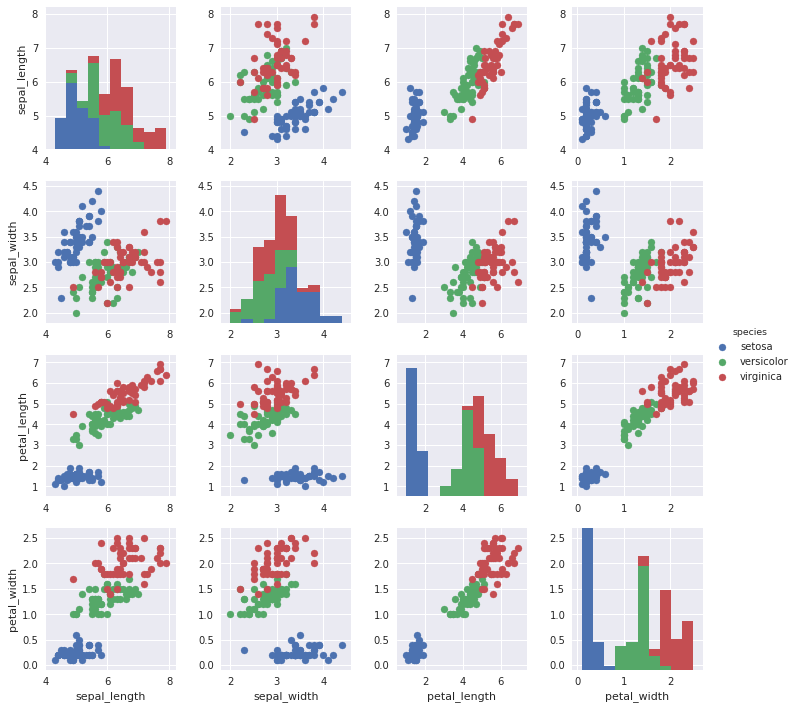

In [200]:
# masih belum pasti
iris_set = sns.load_dataset("iris")
g = sns.PairGrid(iris_set, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'